In [96]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('OnlineNewsPopularity.csv', skipinitialspace=True)
pd.options.display.max_columns = 70
pd.options.display.max_rows = 100
pd.options.display.width=None

In [87]:
# set seaborn styles
sns.set_style("darkgrid")
sns.set_context("paper")

In [4]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [5]:
df.shape

(39644, 61)

In [6]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


<h3></h3>

In [66]:
# check correlations between all features. display all that are above 0.5
# starting point - https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

correlation_matrix = df.corr().abs()
series = correlation_matrix.unstack()
ordered_series = s.sort_values(kind="quicksort", ascending=False)
ordered_series[(ordered_series > .5) & (ordered_series != 1)]

# some very strong correlation clusters. many of the highest correlation scores come from pairs of features which 
# are inter-related in nature eg. n_unique_tokens and n_non_stop_unique_tokens 
# can get insight into what the LDA topic categories refer to by observing correlations with specific data channels
# groups of features which are strongly correlated should not be included together in predictive models,
# as this can lead to overfitting.
# why don't weekday_is_saturday and weekday_is_sunday have a 1.0 correlation with is_weekend? maybe investigate

n_non_stop_unique_tokens       n_unique_tokens                  0.999852
n_unique_tokens                n_non_stop_unique_tokens         0.999852
n_non_stop_words               n_unique_tokens                  0.999572
n_unique_tokens                n_non_stop_words                 0.999572
n_non_stop_unique_tokens       n_non_stop_words                 0.999532
n_non_stop_words               n_non_stop_unique_tokens         0.999532
kw_max_min                     kw_avg_min                       0.940529
kw_avg_min                     kw_max_min                       0.940529
kw_min_min                     kw_max_max                       0.857226
kw_max_max                     kw_min_min                       0.857226
self_reference_max_shares      self_reference_avg_sharess       0.853480
self_reference_avg_sharess     self_reference_max_shares        0.853480
LDA_02                         data_channel_is_world            0.836618
data_channel_is_world          LDA_02              

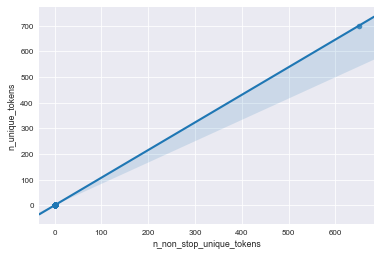

In [89]:
sns.regplot(x='n_non_stop_unique_tokens', y='n_unique_tokens', data=df)
# example of very strong correlation between features. nearly perfect linear relationship. these two features would
# likely not be included together in a predictive model.

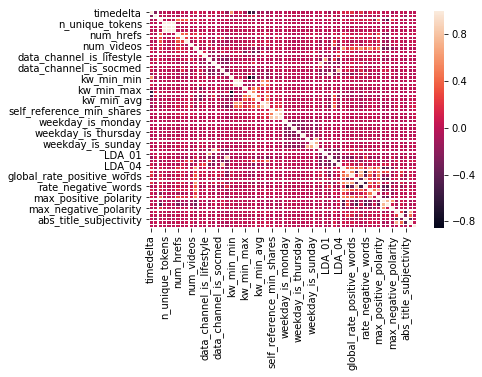

In [9]:
sns.heatmap(corr, linecolor='white', linewidth='.3')
# not really useful. too many features 

In [46]:
# show correlations between target feature and all other features. 
# no single feature is strongly correlated with target. kw_avg_avg has the highest with only 0.110413 (see plot below)
df.corr()['shares']

timedelta                        0.008662
n_tokens_title                   0.008783
n_tokens_content                 0.002459
n_unique_tokens                  0.000806
n_non_stop_words                 0.000443
n_non_stop_unique_tokens         0.000114
num_hrefs                        0.045404
num_self_hrefs                  -0.001900
num_imgs                         0.039388
num_videos                       0.023936
average_token_length            -0.022007
num_keywords                     0.021818
data_channel_is_lifestyle        0.005831
data_channel_is_entertainment   -0.017006
data_channel_is_bus             -0.012376
data_channel_is_socmed           0.005021
data_channel_is_tech            -0.013253
data_channel_is_world           -0.049497
kw_min_min                      -0.001051
kw_max_min                       0.030114
kw_avg_min                       0.030406
kw_min_max                       0.003901
kw_max_max                       0.007863
kw_avg_max                       0

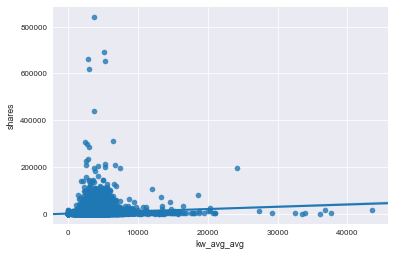

In [88]:
sns.regplot(x="kw_avg_avg", y="shares", data=df)
# no linear relationship

In [84]:
# closer look at the different types of features.
# because there are so many features in this dataset, it may be helpful to break the feature types into categories
# and look at each category individually.
# come back and discuss each in more detail. put in the constant/duplicate cols checks before this section.

In [81]:
# the following features relate to basic word stats from the articles.
df_text_stats = df[['n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'average_token_length']]
df_text_stats.describe().drop('count')

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length
mean,10.398749,546.514731,0.548216,0.996469,0.689175,4.548239
std,2.114037,471.107508,3.520708,5.231231,3.264816,0.844406
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.478404
50%,10.000000,409.000000,0.539226,1.000000,0.690476,4.664082
75%,12.000000,716.000000,0.608696,1.000000,0.754630,4.854839
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,8.041534


In [82]:
# this group of features are generated using natural language processing methods.
# note: the lda topic features are also nlp, but are parts of a single categorical feature, which requires a 
# different type of descriptive table (see below)

df_nlp = df[['global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']]
df_nlp.describe().drop('count') # count is the same value in all cases, so dropped
#

,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
mean,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064
std,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294
min,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,0.453457,0.119117,0.039023,0.015337,0.710526,0.280000,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000
75%,0.508333,0.177832,0.050279,0.021739,0.800000,0.384615,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000
max,1.000000,0.727841,0.155488,0.184932,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000


In [79]:
# add the features that are dummy cols for categorical features 
# get sheena's new categorical cols and do a .describe().T

In [83]:
# these features refer to keywords contained in the metadata of an article's webpage

df_keywords = df[['kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'num_keywords']]
df_keywords.describe().drop('count')

,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,num_keywords
mean,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,7.223767
std,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,1.909130
min,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,6.000000
50%,-1.000000,660.000000,235.500000,1400.000000,843300.000000,244572.222223,1023.635611,4355.688836,2870.074878,7.000000
75%,4.000000,1000.000000,357.000000,7900.000000,843300.000000,330980.000000,2056.781032,6019.953968,3600.229564,9.000000
max,377.000000,298400.000000,42827.857143,843300.000000,843300.000000,843300.000000,3613.039820,298400.000000,43567.659946,10.000000


In [85]:
# the following features relate to links in the articles. i have included images and videos in this category too,
# as they didn't fit into any others (anything with an <a>!)
df_links = df[['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess']]
df_links.describe()

,num_hrefs,num_self_hrefs,num_imgs,num_videos,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.883690,3.293638,4.544143,1.249874,3998.755396,10329.212662,6401.697580
std,11.332017,3.855141,8.309434,4.107855,19738.670516,41027.576613,24211.332231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,1.000000,0.000000,639.000000,1100.000000,981.187500
50%,8.000000,3.000000,1.000000,0.000000,1200.000000,2800.000000,2200.000000
75%,14.000000,4.000000,4.000000,1.000000,2600.000000,8000.000000,5200.000000
max,304.000000,116.000000,128.000000,91.000000,843300.000000,843300.000000,843300.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a11c88e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1858fa90>]], dtype=object)

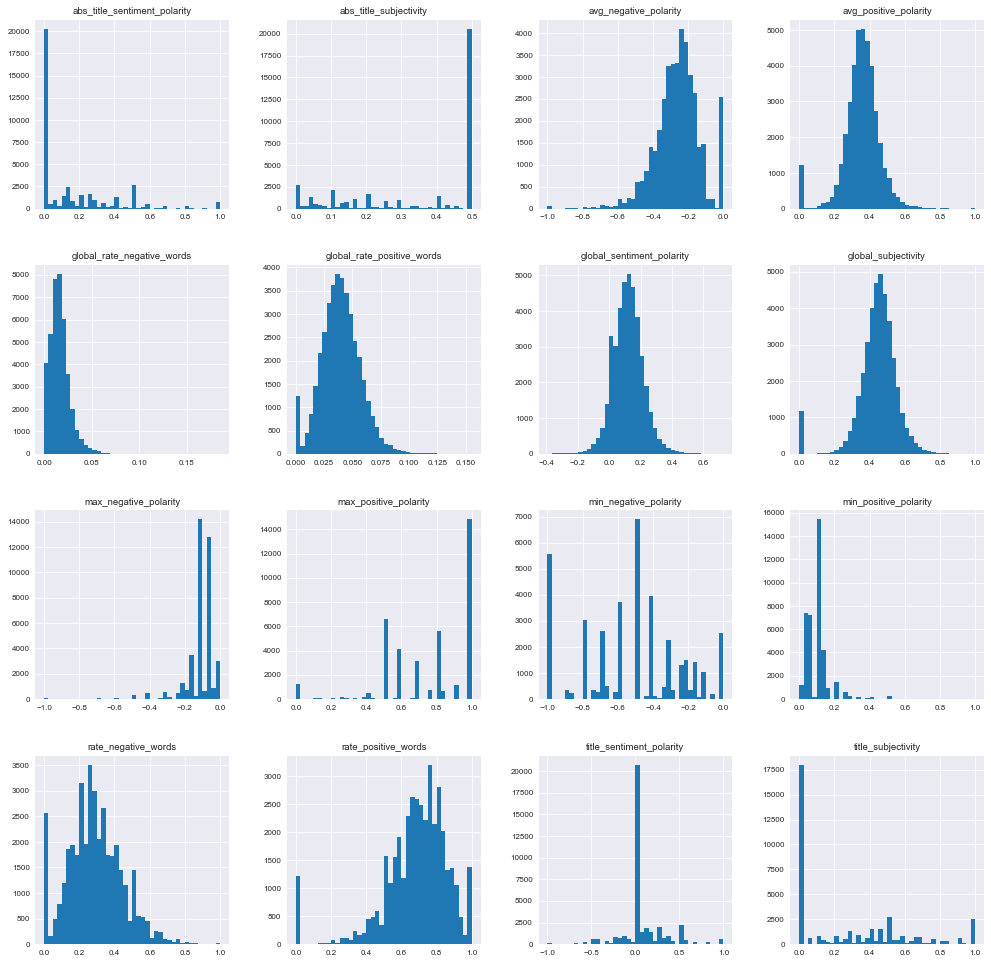

In [98]:
# a sample selection of histograms (the nlp feature group), but might create more.
# add basic observations
df_nlp.hist(figsize=(17,17), bins=40)

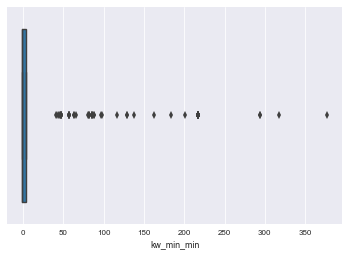

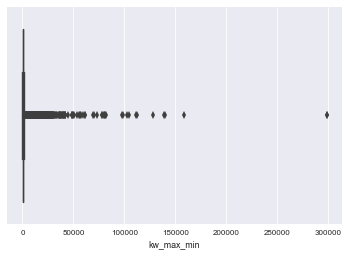

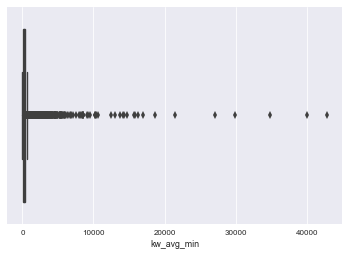

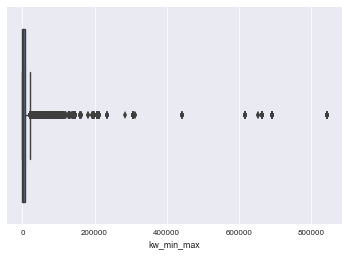

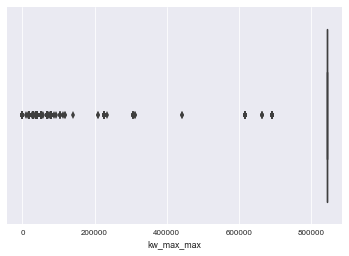

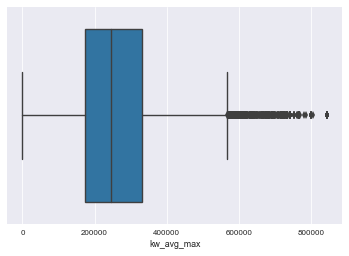

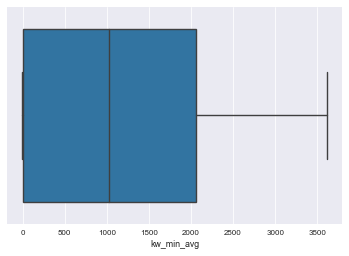

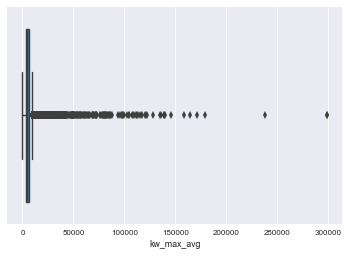

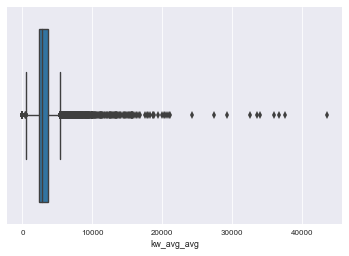

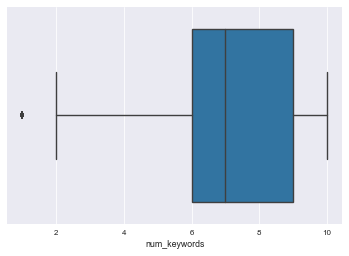

In [97]:
# use PdfPages to compile a pdf file of box plots. we can repeat this for any other group of features
# if necessary
pp = PdfPages('df_keyword_box_plots.pdf')
for col in df_keywords:
    f = sns.boxplot(df_keywords[col])
    pp.savefig(f.get_figure())
    plt.show()
pp.close()

In [ ]:
# once i add in sheena's categorical cols, can do some barplots for them here.